<a href="https://colab.research.google.com/github/NapoliD/Stock_Price/blob/master/Original_Stock_Price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb

https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/') 

In [ ]:
#import os
#os.chdir('/content/drive/My Drive/GOOGLE_COLAB/Stock_Price/')

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Acciones grupo galicia

In [59]:
df = web.DataReader('YPFD.BA', data_source='yahoo', start='2020-04-01', end='2020-09-18')
#df = web.DataReader('GGAL.BA', data_source='yahoo', start='2020-04-01', end='2020-09-18')
#df = web.DataReader('BTC-USD', data_source='yahoo', start='2020-08-01', end='2020-09-14')

In [60]:
#df


In [61]:
df['dias'] = df.index

In [62]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'dias'], dtype='object')

In [63]:
df.dtypes

High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dias         datetime64[ns]
dtype: object

In [64]:
#df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.Date

In [65]:
group = df.groupby('Date')
group

In [66]:
Real_Price = group['Close'].mean()


<h1> Días de prediccon

In [67]:
prediction_days = 15

In [68]:
Real_Price_Frame=pd.DataFrame(Real_Price)


In [69]:
Real_Price_Frame['Close']

Date
2020-04-01    366.000000
2020-04-02    383.000000
2020-04-03    388.350006
2020-04-06    392.000000
2020-04-07    378.450012
                 ...    
2020-09-14    649.400024
2020-09-15    654.400024
2020-09-16    613.849976
2020-09-17    580.250000
2020-09-18    596.750000
Name: Close, Length: 115, dtype: float64

In [70]:
# Últimos  días para entrenar
Real_Price[len(Real_Price)-prediction_days:]

Date
2020-08-31    723.599976
2020-09-01    720.200012
2020-09-02    692.299988
2020-09-03    676.900024
2020-09-04    672.250000
2020-09-07    677.150024
2020-09-08    664.200012
2020-09-09    681.900024
2020-09-10    669.200012
2020-09-11    668.150024
2020-09-14    649.400024
2020-09-15    654.400024
2020-09-16    613.849976
2020-09-17    580.250000
2020-09-18    596.750000
Name: Close, dtype: float64

In [71]:
# Resto de años para test
Real_Price[:len(Real_Price)-prediction_days]

Date
2020-04-01    366.000000
2020-04-02    383.000000
2020-04-03    388.350006
2020-04-06    392.000000
2020-04-07    378.450012
                 ...    
2020-08-24    715.700012
2020-08-25    717.299988
2020-08-26    699.250000
2020-08-27    674.900024
2020-08-28    711.150024
Name: Close, Length: 100, dtype: float64

In [72]:
Real_Price[len(Real_Price)-prediction_days:]

Date
2020-08-31    723.599976
2020-09-01    720.200012
2020-09-02    692.299988
2020-09-03    676.900024
2020-09-04    672.250000
2020-09-07    677.150024
2020-09-08    664.200012
2020-09-09    681.900024
2020-09-10    669.200012
2020-09-11    668.150024
2020-09-14    649.400024
2020-09-15    654.400024
2020-09-16    613.849976
2020-09-17    580.250000
2020-09-18    596.750000
Name: Close, dtype: float64

In [73]:
# split data
df_train= Real_Price[len(Real_Price)-prediction_days:]
df_test= Real_Price[:len(Real_Price)-prediction_days]

In [74]:
# Selecciono valores
training_set = df_train.values


In [75]:
training_set = np.reshape(training_set, (len(training_set), 1))


In [76]:
# Data preprocess
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [77]:
# Excluímos último día
x_train = training_set[0:len(training_set)-1]
x_train = sc.fit_transform(x_train)
x_train = np.reshape(x_train, (len(x_train), 1, 1))



In [78]:
# Excluímos primer día
y_train = training_set[1:len(training_set)]
y_train = sc.fit_transform(y_train)


In [79]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [80]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [81]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
14/14 [==============================] - 0s 2ms/step - loss: 0.2991
Epoch 2/25
14/14 [==============================] - 0s 3ms/step - loss: 0.1542
Epoch 3/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 4/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 5/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 6/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 7/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 8/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0341
Epoch 9/25
14/14 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 10/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 11/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 12/25
14/14 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 13/25
14/14 [==============================

In [82]:
Real_Price[:len(Real_Price)]

Date
2020-04-01    366.000000
2020-04-02    383.000000
2020-04-03    388.350006
2020-04-06    392.000000
2020-04-07    378.450012
                 ...    
2020-09-14    649.400024
2020-09-15    654.400024
2020-09-16    613.849976
2020-09-17    580.250000
2020-09-18    596.750000
Name: Close, Length: 115, dtype: float64

In [83]:
#Lunes
df_test= Real_Price[:len(Real_Price)-1]

test_set = df_test.values[1:] #next day and follow

inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1)) #until to the day
inputs = sc.fit_transform(inputs)
np.reshape(inputs, (len(inputs), 1, 1))
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

#Calculate/Get the value of RMSE
RMSE=np.sqrt(np.mean(((predicted_BTC_price- test_set)**2)))

predicted_BTC_price[-1]

array([594.0971], dtype=float32)

In [84]:
RMSE

177.54243180640162

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
mean_squared_error(predicted_BTC_price,test_set,squared=False)

27.90824248832902

<h1> Predict

In [87]:
predicted_BTC_price[-1]

array([594.0971], dtype=float32)

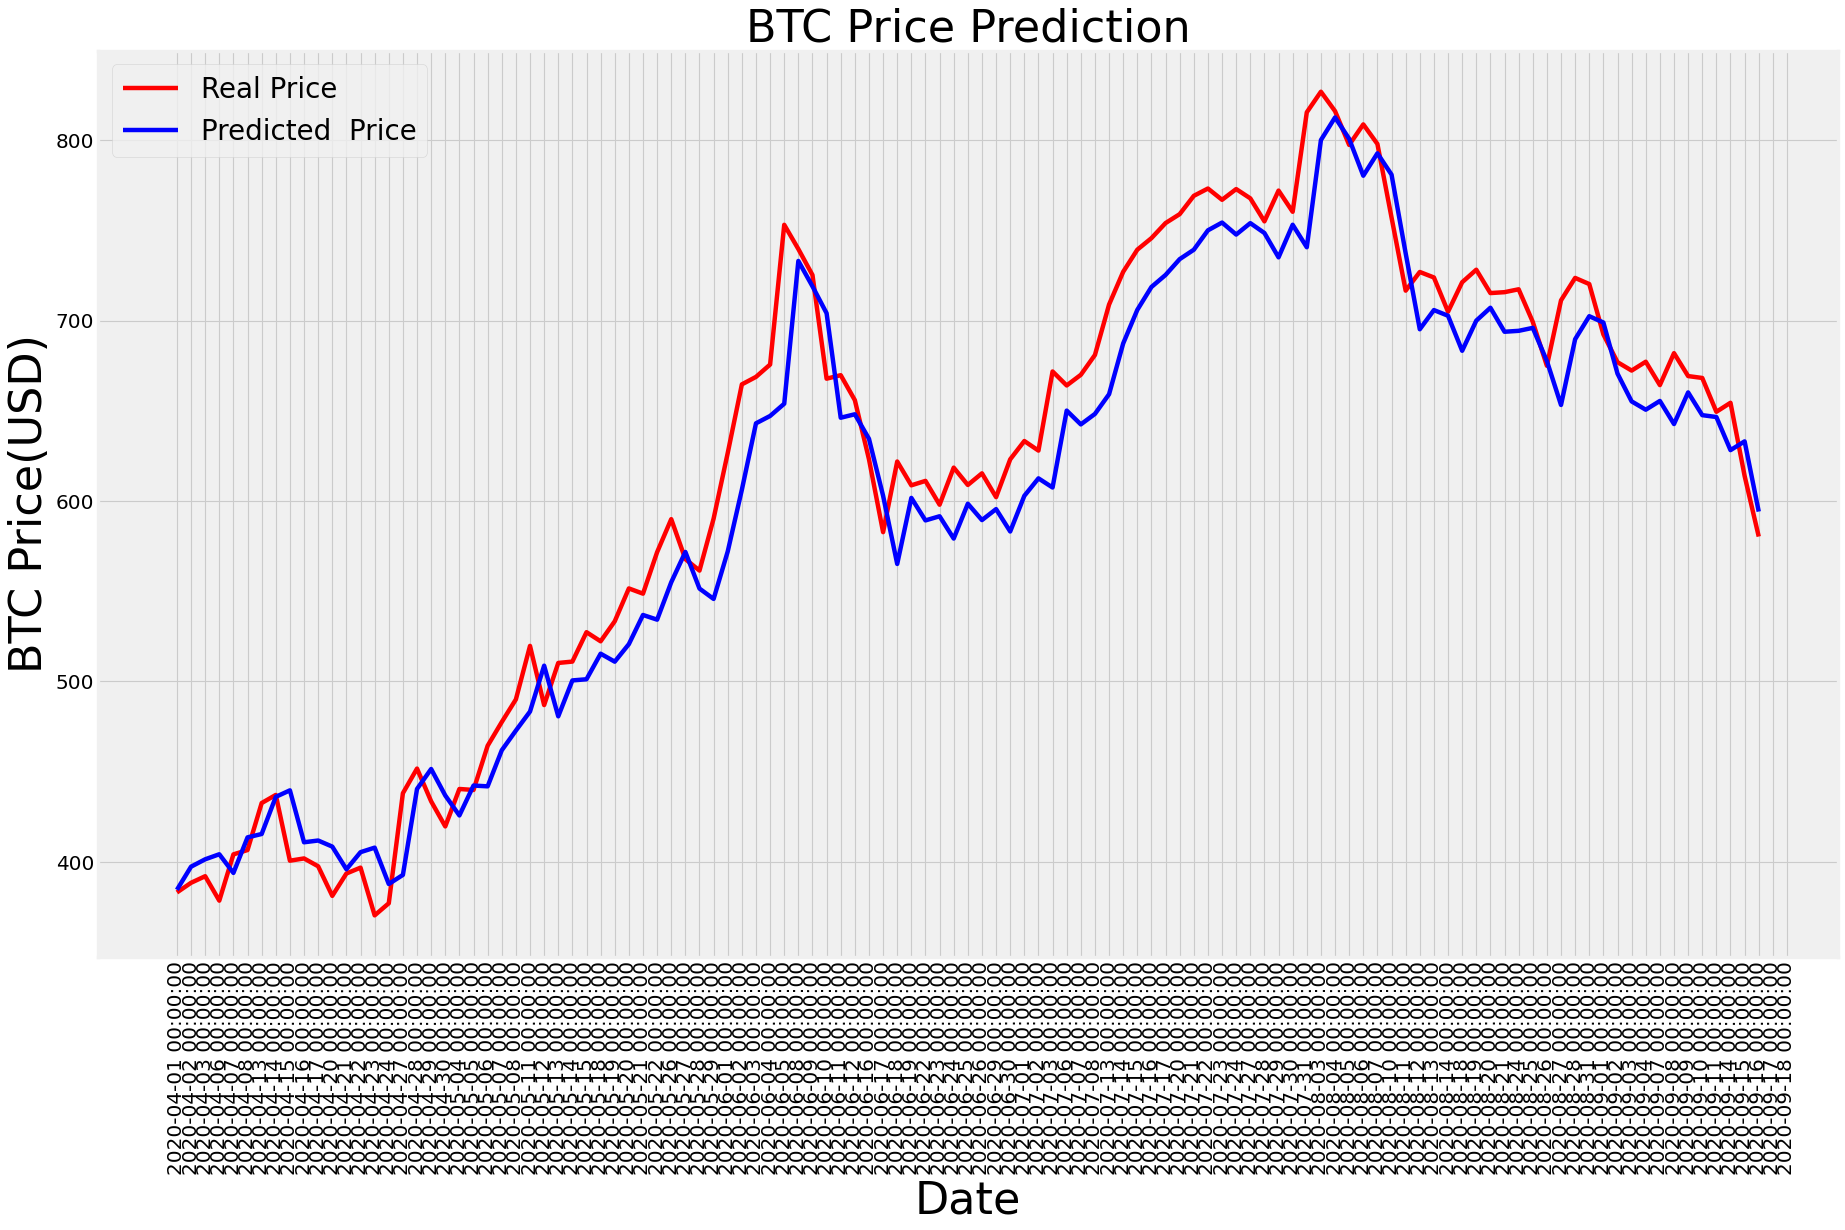

In [88]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted  Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test= Real_Price[:len(Real_Price)]
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Date', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()




Grafico